<style>
    h1 {
        color: #178773; 
        font-size: 50px !important;
    }
    h2 {
    	background-color: #178773;
    	color: white;
    	font-size: 25px !important;
    	font-weight: 300 !important;
    	padding: 5px;
    	display: inline flow-root list-item;
    }
    h3 {
        color: #178773; 
        font-size: 20px !important;
        font-weight: 500 !important;
    }   
    .jp-RenderedImage {
        display: flex;
        justify-content: center;
    }
    .navbar {display: none}
    
    h4 {
    	color: #178773;
    	font-size: 34px !important;
    	font-weight: 900 !important;
    	margin-bottom: 25px;
    }
    .jp-Notebook {
    max-width: 1220px;
      justify-content: center;
      display: flex;
      margin: auto;
      }
    
    .ksln-grid {
      justify-content: left;
      display: grid;
      margin: 50px 0px;	
      gap: 25px;
      grid-template-columns: 100%;
      max-width: 95%;  
    }
    .ksln-grid-2c {
      justify-content: left;
      display: grid;
      margin: 50px 0px;	
      gap: 25px;
      grid-template-columns: 50% 50%;
      max-width: 95%;  
    }
    .ksln-cards {
        border: 0.05rem solid var(--md-default-fg-color--lightest);
        border-radius: 0.1rem;
        padding: 0.8rem;
        width: 100%;
        box-shadow: 0px 0px 3px rgb(0 0 0 / 15%);
        font-weight: 300;
        background-color: var(--md-default-bg-color);
    }
    @media only screen and (min-width: 769px) and (max-width: 1399px) {
    .ksln-grid {
      grid-template-columns: 50% 50%;
    }
    }
    @media only screen and (min-width: 1400px) {
    .ksln-grid {
      grid-template-columns: 33.33337% 33.33337% 33.33337%;
    }
    }
</style>

In [2]:
import mercury as mr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from textwrap import wrap
from IPython.display import display, HTML, Markdown

app = mr.App(title="Diag360 - Outil de visualisation", description="Tableaux de bord des besoins et enjeux de résilience du territoire.")

# PARAMETRAGE
# Définir la taille en pixels / 100 (inches)
width_inch = 450 / 100
height_inch = 450 / 100

def add_to_radar(df, groupe, s_groupe):

    # Regrouper les données par type de besoins et besoins
    df_grouped = df.groupby([groupe,s_groupe])["valeur_indice"].mean().reset_index()
    # Ajouter une colonne pour identifier les groupes "A", "B", "C", etc.
    df_grouped["Indice"] = (df_grouped[groupe] != df_grouped[groupe].shift()).cumsum().map(lambda x: chr(64 + x))
    # Cumulative length
    values = df_grouped["valeur_indice"].values

    # Initialize layout in polar coordinates
    # fig, ax = plt.subplots(figsize=(4.5, 4.5), subplot_kw={"projection": "polar"})
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

    # Parametres d'espace
    labels = df_grouped[s_groupe].values
    values = df_grouped["valeur_indice"].values
    angles = np.linspace(0, 2 * np.pi, len(df_grouped), endpoint=False)
    num_vars = len(labels)
    
    # Normalisation des valeurs entre 0 et 1
    norm = Normalize(vmin=0, vmax=1)
    # Choisir une colormap
    cmap = plt.get_cmap('RdYlGn')  # 'RdYlGn' va du rouge (faible valeur) au vert (haute valeur)
    # Convertir les valeurs en couleurs
    colors = cmap(norm(values))
    
    # ================ PLOT & Some layout stuff ================
    # Change the color of the outermost gridline (the spine).
    ax.spines['polar'].set_color('white')
    # Fix axis to go in the right order and start at 12 o'clock.
    ax.set_theta_offset(np.pi / 2)
    #ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles), labels)
    
    
    # ======= AUTRES ELEMENTS DE DESIGN
    # Change the color of the outermost gridline (the spine).
    ax.spines['polar'].set_color('white')
    # Change the background color inside the circle itself.
    ax.set_facecolor('#FAFAFA')
    # ax.fill(angles, values, color='#0b927b', alpha=0.3, zorder=11)
    # fig.patch.set_facecolor("white")
    
    
    # ======== LABELS ========
    # Go through labels and adjust alignment based on where it is in the circle.
    # Go through labels and adjust alignment based on where it is in the circle.
    for label, angle in zip(ax.get_xticklabels(), angles):
      if angle in (0, np.pi):
        label.set_horizontalalignment('center')
      elif 0 < angle < np.pi:
        label.set_horizontalalignment('right')
      else:
        label.set_horizontalalignment('left')

    
    ax.set_axisbelow(False)
    
    
    # ======= AXE X =========
    labels = ["\n".join(wrap(r[:38] + ('...' if len(r) > 38 else ''), 22, break_long_words=False)) for r in labels]
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)
    ax.tick_params(axis='x',labelfontfamily='Dosis' , labelsize=16-0.25*num_vars, labelcolor='#222', grid_color='#555', grid_alpha=0.1, pad=3)
    # Ploting the bars to represent the cumulative track
    ax.bar(angles, values, color=colors, alpha=1, width=2*np.pi/num_vars, zorder=1, linewidth=3, edgecolor='white')
    
                  
    # ======= AXE Y =========
    # Make the y-axis (0-100) labels smaller.
    ax.tick_params(axis='y', labelcolor='white', labelsize=0, grid_color='#FFF', grid_alpha=0, width=0)
    ax.set_ylim(0, 1.05)

mercury.App

In [ ]:
# TELECHARGEMENT DU FICHIER MASTER

# Ajouter un widget de téléchargement de fichier
my_file = mr.File(label="Téléchargement de fichier")

texte = """<div style="margin-top: 100px; background-color: #FAFAFA; max-width: 100%"><div class="ksln-cards" style="margin: 2px;"><h1>Vous débutez avec Diag360 ?</h1>\n\n1. Télécharger ce fichier et suivez les instructions, nous vous retrouvons ici juste après 🤗 : [Télécharger le tableur de données](https://github.com/Konsilion/diag360/raw/master/mkdocs/media/Diag360_Indicateurs.xlsx)
\n2. Une fois le fichier remplis, cliquer sur le **bouton 'Browse' à gauche**, et séléctionnez votre tableur de travail.
\n\nPour plus d'information, rendez-vous sur le site suivant : [Documentation Diag360](https://konsilion.github.io/diag360/)</div></div>"""


if my_file.filepath is None:
    display(Markdown(texte))
    mr.Stop()

# Charger les données du fichier CSV
df = pd.read_excel(my_file.filepath, sheet_name="Export")
df_besoins = pd.read_excel(my_file.filepath, sheet_name="Besoins_Infos")

# Charger les données du fichier Excel
#df = pd.read_excel("/home/nicolasbremond/Nextcloud/NBD - PERSO/3 - ASSOCIATIF/1 - KONSILION/Diag360/Indicateurs_V3.xlsx", sheet_name="Export")
#url = "https://github.com/Konsilion/diag360/raw/master/mkdocs/media/Diag360_Indicateurs.xlsx"
#df = pd.read_excel(url, sheet_name="Export")
#df_besoins = pd.read_excel(url, sheet_name="Besoins_Infos")

mapping = {
    'Besoins': 'besoins',
    'Indicateurs': 'designation_indicateur',
}

# Liste des clés du dictionnaire pour le menu déroulant
list_ticker = list(mapping.keys())
choice_ticker3 = 'Besoins'
ticker_h2 = mr.Select(value='Besoins', choices=list_ticker, label="Quoi afficher ?")
choice_ticker3 = mapping[ticker_h2.value]


mapping = {
    'Tous': 'Tous',
    'Vitaux': 'Vitaux',
    'Essentiels': 'Essentiels',
    'Induits': 'Induits'
}

# Liste des clés du dictionnaire pour le menu déroulant
list_ticker = list(mapping.keys())
choice_ticker = 'Tous'
ticker = mr.Select(value='Tous', choices=list_ticker, label="Selectionnez un type de besoin :")
choice_ticker = mapping[ticker.value]

if choice_ticker != 'Tous':   
    # Filtrer la DataFrame selon choice_ticker
    df = df[df['type_besoins'] == choice_ticker]




# Liste des clés du dictionnaire pour le menu déroulant
list_ticker = ['Transformation','Subsistance','Soutenabilité','Gestion de crise']
choice_ticker2 = ["Transformation"]
#ticker = mr.Select(value='Tous', choices=list_ticker, label="Selectionnez les objectifs territoriaux :")
ticker = mr.MultiSelect(label = "Selectionnez les objectifs territoriaux :", value = list_ticker, choices = list_ticker)
choice_ticker2 = list(ticker.value)

if choice_ticker2 != []:   
    # Filtrer la DataFrame selon choice_ticker2
    df = df[df['objectif'].isin(choice_ticker2)]

 

# Texte en une seule ligne de markdown
texte = """# **Tour d'horizon de votre résilience territoriale**
\n\n <img src=\"https://github.com/Konsilion/konsilion-drive/blob/main/Diag360/Logo_Diag360.png?raw=true\" alt=\"Texte alternatif\" style=\"float:right; width:150px; height:150px; margin: 30px\"> 
Le Diag 360 vise à donner une photographie du degré de vulnérabilité et de résilience du territoire à un moment donné. Cette photographie établit un diagnostic simple des enjeux du territoire, 
met en exergue les faiblesses et les forces du territoire du point de vue de la résilience, et oriente les réflexions stratégiques et actions opérationnelles. 
Il permet d’établir un état des lieux initial avant d’engager une démarche de résilience, puis d’évaluer l’évolution de cette résilience au fil du temps. Il offre aussi un levier de comparaison du niveau de résilience avec des territoires voisins ou similaires. 
\n\n Il se fonde sur une approche par les besoins des habitants, suivant la Théorie du Donut proposée par Kate Raworth. 
Cette approche 360° vise à embrasser l’ensemble des besoins dans une vision holistique. Fondé sur des indicateurs chiffrés, il dépend néanmoins de 
la disponibilité des données et ne peut donc prétendre à l’exhaustivité dans son analyse : d’où la notion de « photographie » qui expose le caractère illustratif et représentatif du Diag 360."""
display(Markdown(texte))


texte_h2 = "## " + ticker_h2.value + " - " + choice_ticker
display(Markdown(texte_h2))

texte = "### Sur enjeux de " + ", ".join(choice_ticker2) + "<hr>"
if choice_ticker2 == []:
    texte = "### Sur enjeux de Transformation, Subsistance, Soutenabilité, Gestion de crise"

display(Markdown(texte))

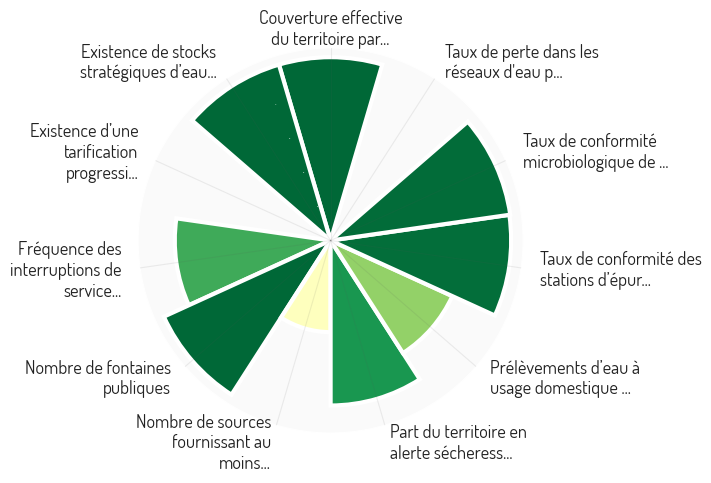

In [ ]:
add_to_radar(df,'type_besoins',choice_ticker3)

In [ ]:
# Function to truncate description
def truncate_text(text, max_length=400):
    return text if len(text) <= max_length else text[:max_length] + ' [...]'

if choice_ticker3 == 'besoins':
    # Generate HTML content
    html_content = '<h3>Description des besoins séléctionnés</h3><hr><div class="ksln-grid">\n'
    for index, row in df_besoins.iterrows():
        if row['besoins'] in df['besoins'].values:
            html_content += f"""
            <div class="ksln-cards" style="margin: 0px auto auto 3px;">
                <h3 style="padding: 7px; color: white; background-color: #178773;">{row['besoins']}</h3>
                {truncate_text(row['description'])}
                <hr>
                <a class="md-button md-button--primary" href="{row['lien']}" target="_blank">Lien</a>
            </div>
            """
    
    html_content += '</div>'
else:
    html_content = '<div><h2>Description des indicateurs bientôt disponible.</h2><br>Pour tester cette fonctionnalité, séléctionner dans "Quoi afficher ? > Besoins"</div>'
    
    
# Display the HTML content
display(HTML(html_content))

<hr>

<img src="https://runmercury.com/images/mercury-black-logo.svg" alt="Texte alternatif" style="float:right; width:150px; height:150px; margin: 0px\">

Outil développé à l'aide du logiciel open-source [Mercury de Mljar](https://runmercury.com/)
